In [0]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.config('spark.driver.maxResultSize', '18g').getOrCreate()

In [0]:
pip install nltk

Python interpreter will be restarted.
Requirement already satisfied: nltk in /local_disk0/.ephemeral_nfs/envs/pythonEnv-9f412cb7-219a-4c81-a2d3-c192955b39be/lib/python3.8/site-packages (3.7)
Requirement already satisfied: joblib in /databricks/python3/lib/python3.8/site-packages (from nltk) (1.0.1)
Requirement already satisfied: click in /local_disk0/.ephemeral_nfs/envs/pythonEnv-9f412cb7-219a-4c81-a2d3-c192955b39be/lib/python3.8/site-packages (from nltk) (8.1.3)
Requirement already satisfied: regex>=2021.8.3 in /local_disk0/.ephemeral_nfs/envs/pythonEnv-9f412cb7-219a-4c81-a2d3-c192955b39be/lib/python3.8/site-packages (from nltk) (2022.9.13)
Requirement already satisfied: tqdm in /local_disk0/.ephemeral_nfs/envs/pythonEnv-9f412cb7-219a-4c81-a2d3-c192955b39be/lib/python3.8/site-packages (from nltk) (4.64.1)
Python interpreter will be restarted.

In [0]:
pip install wordcloud

Python interpreter will be restarted.
Collecting wordcloud
 Using cached wordcloud-1.8.2.2-cp38-cp38-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (458 kB)
Requirement already satisfied: pillow in /databricks/python3/lib/python3.8/site-packages (from wordcloud) (8.2.0)
Requirement already satisfied: numpy>=1.6.1 in /databricks/python3/lib/python3.8/site-packages (from wordcloud) (1.20.1)
Requirement already satisfied: matplotlib in /databricks/python3/lib/python3.8/site-packages (from wordcloud) (3.4.2)
Requirement already satisfied: python-dateutil>=2.7 in /databricks/python3/lib/python3.8/site-packages (from matplotlib->wordcloud) (2.8.1)
Requirement already satisfied: cycler>=0.10 in /databricks/python3/lib/python3.8/site-packages (from matplotlib->wordcloud) (0.10.0)
Requirement already satisfied: kiwisolver>=1.0.1 in /databricks/python3/lib/python3.8/site-packages (from matplotlib->wordcloud) (1.3.1)
Requirement already satisfied: pyparsing>=2.2.1 in /databricks/python3/lib/python3.8/site-packages (from matplotlib->wordcloud) (2.4.7)
Requirement already satisfied: six in /databricks/python3/lib/python3.8/site-packages (from cycler>=0.10->matplotlib->wordcloud) (1.15.0)
Installing collected packages: wordcloud
Successfully installed wordcloud-1.8.2.2
Python interpreter will be restarted.

In [0]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords #停用词
from nltk.tokenize import word_tokenize
import re
import matplotlib.pyplot as plt
import string
import pandas as pd
from collections import Counter
from wordcloud import WordCloud
from sklearn.feature_extraction import *

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data] Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data] Package punkt is already up-to-date!

In [0]:
def remove_upprintable_chars(s):
    
    return ''.join(x for x in s if x.isprintable())
# 分词操作是 word_tokenize() 之后转换成小写
def preprocess(text):
        text = re.sub('[0-9’!"#$%&\'()*+,-./:;<=>?@，。?★、…【】《》？“”‘’！[\\]^_`{|}~\s]+', " ", text)
        text = re.sub('[\001\002\003\004\005\006\007\n\x08\x09\x0a\x0b\x0c\x0d\x0e\x0f\x10\x11\x80\x90\x12\x13\x14\x15\x16\x17\x18\x19\x1a]+', '', text)
        tokens= word_tokenize(text)
        token_list =[remove_upprintable_chars(word.lower()) for word in tokens]
        filtered=[w for w in token_list if(w not in stopwords.words('english'))]
        
        return ' '.join(filtered)

In [0]:
from pyspark.sql.functions import lit,col
import pyspark.sql.functions as F
from pyspark.sql.functions import udf
from pyspark.sql.types import *

In [0]:
def handle(year_range = [2015, 2016, 2017], month_range = range(1, 13)):
    df_samples = None
    for year in year_range:
        
        for month in month_range:
            
            month_literal = str(month)
            data_path = "/mnt/lsde/group05/submission_position_3class/" + str(year) + "-" + month_literal + ".parquet"
            print("start handling "+str(year) + "-" + month_literal)
            df =spark.read.load(data_path,format="parquet")
            df_sam = df.sample(fraction=0.01,seed = 123)
            
            text_path = "/mnt/lsde/group05/kwfilter_top3/" + str(year) + "-" + month_literal + ".parquet"
            submission_text = spark.read.load(text_path,format="parquet")
            df_submission_all=df_sam.join(submission_text,"id").select(df_sam.id,"selftext","result")
            if df_samples is None:
                df_samples = df_submission_all
            else:
                df_samples = df_samples.union(df_submission_all)
            print("finish handling "+str(year) + "-" + month_literal)
    return df_samples

In [0]:
submission_2014 = handle([2014],range(2,13))

start handling 2014-2
finish handling 2014-2
start handling 2014-3
finish handling 2014-3
start handling 2014-4
finish handling 2014-4
start handling 2014-5
finish handling 2014-5
start handling 2014-6
finish handling 2014-6
start handling 2014-7
finish handling 2014-7
start handling 2014-8
finish handling 2014-8
start handling 2014-9
finish handling 2014-9
start handling 2014-10
finish handling 2014-10
start handling 2014-11
finish handling 2014-11
start handling 2014-12
finish handling 2014-12

In [0]:
submission_from2015= handle(range(2015,2022),range(1,13))

start handling 2015-1
finish handling 2015-1
start handling 2015-2
finish handling 2015-2
start handling 2015-3
finish handling 2015-3
start handling 2015-4
finish handling 2015-4
start handling 2015-5
finish handling 2015-5
start handling 2015-6
finish handling 2015-6
start handling 2015-7
finish handling 2015-7
start handling 2015-8
finish handling 2015-8
start handling 2015-9
finish handling 2015-9
start handling 2015-10
finish handling 2015-10
start handling 2015-11
finish handling 2015-11
start handling 2015-12
finish handling 2015-12
start handling 2016-1
finish handling 2016-1
start handling 2016-2
finish handling 2016-2
start handling 2016-3
finish handling 2016-3
start handling 2016-4
finish handling 2016-4
start handling 2016-5
finish handling 2016-5
start handling 2016-6
finish handling 2016-6
start handling 2016-7
finish handling 2016-7
start handling 2016-8
finish handling 2016-8
start handling 2016-9
finish handling 2016-9
start handling 2016-10
finish handling 2016-10
start handling 2016-11
finish handling 2016-11
start handling 2016-12
finish handling 2016-12
start handling 2017-1
finish handling 2017-1
start handling 2017-2
finish handling 2017-2
start handling 2017-3
finish handling 2017-3
start handling 2017-4
finish handling 2017-4
start handling 2017-5
finish handling 2017-5
start handling 2017-6
finish handling 2017-6
start handling 2017-7
finish handling 2017-7
start handling 2017-8
finish handling 2017-8
start handling 2017-9
finish handling 2017-9
start handling 2017-10
finish handling 2017-10
start handling 2017-11
finish handling 2017-11
start handling 2017-12
finish handling 2017-12
start handling 2018-1
finish handling 2018-1
start handling 2018-2
finish handling 2018-2
start handling 2018-3
finish handling 2018-3
start handling 2018-4
finish handling 2018-4
start handling 2018-5
finish handling 2018-5
start handling 2018-6
finish handling 2018-6
start handling 2018-7
finish handling 2018-7
start handling 2018-8
finish handling 2018-8
start handling 2018-9
finish handling 2018-9
start handling 2018-10
finish handling 2018-10
start handling 2018-11
finish handling 2018-11
start handling 2018-12
finish handling 2018-12
start handling 2019-1
finish handling 2019-1
start handling 2019-2
finish handling 2019-2
start handling 2019-3
finish handling 2019-3
start handling 2019-4
finish handling 2019-4
start handling 2019-5
finish handling 2019-5
start handling 2019-6
finish handling 2019-6
start handling 2019-7
finish handling 2019-7
start handling 2019-8
finish handling 2019-8
start handling 2019-9
finish handling 2019-9
start handling 2019-10
finish handling 2019-10
start handling 2019-11
finish handling 2019-11
start handling 2019-12
finish handling 2019-12
start handling 2020-1
finish handling 2020-1
start handling 2020-2
finish handling 2020-2
start handling 2020-3
finish handling 2020-3
start handling 2020-4
finish handling 2020-4
start handling 2020-5
finish handling 2020-5
start handling 2020-6
finish handling 2020-6
start handling 2020-7
finish handling 2020-7
start handling 2020-8
finish handling 2020-8
start handling 2020-9
finish handling 2020-9
start handling 2020-10
finish handling 2020-10
start handling 2020-11
finish handling 2020-11
start handling 2020-12
finish handling 2020-12
start handling 2021-1
finish handling 2021-1
start handling 2021-2
finish handling 2021-2
start handling 2021-3
finish handling 2021-3
start handling 2021-4
finish handling 2021-4
start handling 2021-5
finish handling 2021-5
start handling 2021-6
finish handling 2021-6
start handling 2021-7
finish handling 2021-7
start handling 2021-8
finish handling 2021-8
start handling 2021-9
finish handling 2021-9
start handling 2021-10
finish handling 2021-10
start handling 2021-11
finish handling 2021-11
start handling 2021-12
finish handling 2021-12

In [0]:
submission_2022 = handle([2022],range(1,9))

start handling 2022-1
finish handling 2022-1
start handling 2022-2
finish handling 2022-2
start handling 2022-3
finish handling 2022-3
start handling 2022-4
finish handling 2022-4
start handling 2022-5
finish handling 2022-5
start handling 2022-6
finish handling 2022-6
start handling 2022-7
finish handling 2022-7
start handling 2022-8
finish handling 2022-8

In [0]:
submissions_all =submission_2014.union(submission_from2015).union(submission_2022)

In [0]:
submissions_all.show()

+------+--------------------+------+
 id| selftext|result|
+------+--------------------+------+
1yu717| | [0.0]|
1yw0gs|https://www.kicks...| [2.0]|
1yz7hr| | [0.0]|
1wxvv5| | [0.0]|
1wzk4j| | [0.0]|
1x175r| | [0.0]|
1x1fdw| | [0.0]|
1x1rll| | [0.0]|
1x3lgk| | [1.0]|
1xc5zt|As the title impl...| [2.0]|
1xcj1o| | [1.0]|
1xel4l| | [1.0]|
1xfkxe| | [0.0]|
1xfm1y| | [0.0]|
1xfzwg|...where the fuck...| [0.0]|
1xhb9b| | [0.0]|
1xiaot| | [2.0]|
1xj6gc| | [0.0]|
1x65tz| | [0.0]|
1x77yw| | [0.0]|
+------+--------------------+------+
only showing top 20 rows

In [0]:
submissions_all.write.mode("overwrite").format("parquet").save("/mnt/lsde/group05/"+"wordcloud_submission_sample/"+".parquet")

In [0]:
#0 for Ukraine 1 for Russia
def judgeAff(lst):
    aff=lst[0]
    if int(float(aff))==1:
        return 1
    elif int(float(aff))==2:
        return 2
    else:
        return 0

In [0]:
judgeAff_f = udf(judgeAff, IntegerType())

In [0]:
spark.udf.register(name="judgeAff_f", f=judgeAff_f)

Out[13]: <function __main__.judgeAff(lst)>

In [0]:
df_withAff = submissions_all.withColumn("aff",judgeAff_f('result'))

In [0]:
df_Ukr= df_withAff.filter(col('aff')==0)

In [0]:
df_Russia = df_withAff.filter(col('aff')==1)

In [0]:
df_Ukr_pd=df_Ukr.toPandas()

In [0]:
df_Russia_pd = df_Russia.toPandas()

In [0]:
df_Ukr_pd.head()

Out[19]:

id 
 selftext 
 result 
 aff 
 
 
 
 
 0 
 1yu717 
 
 [0.0] 
 0 
 
 
 1 
 1yz7hr 
 
 [0.0] 
 0 
 
 
 2 
 1wxvv5 
 
 [0.0] 
 0 
 
 
 3 
 1wzk4j 
 
 [0.0] 
 0 
 
 
 4 
 1x175r 
 
 [0.0] 
 0

In [0]:
df_Ukr_pd['text']=df_Ukr_pd['selftext'].apply(preprocess)

In [0]:
df_Russia_pd['text'] = df_Russia_pd['selftext'].apply(preprocess)

In [0]:
df_Russia_pd.head()

Out[22]:

id 
 selftext 
 result 
 aff 
 text 
 
 
 
 
 0 
 1x3lgk 
 
 [1.0] 
 1 
 
 
 
 1 
 1xcj1o 
 
 [1.0] 
 1 
 
 
 
 2 
 1xel4l 
 
 [1.0] 
 1 
 
 
 
 3 
 1x9lpv 
 
 [1.0] 
 1 
 
 
 
 4 
 1z80rv 
 
 [1.0] 
 1

In [0]:
def getWordList(df,lst):
    for i in range(0,len(df)):
        cur =df.iloc[[i],[4]]['text'].values[0].split(' ')
        lst.extend(cur)
    return lst

In [0]:
russia_lst = getWordList(df_Russia_pd,[])

In [0]:
russia_lst =[wd for wd in russia_lst if wd!='']

In [0]:
ukr_lst = getWordList(df_Ukr_pd,[])

In [0]:
ukr_lst =[wd for wd in ukr_lst if wd!='' and len(wd)>1]

In [0]:
ukr_lst

Out[28]: ['fuck',
 'faggots',
 'islamic',
 'countries',
 'killing',
 'gays',
 'left',
 'right',
 'russia',
 'recently',
 'bans',
 'gays',
 'suddenly',
 'everyone',
 'like',
 'omg',
 'russia',
 'haz',
 'banned',
 'teh',
 'gayz',
 'must',
 'protest',
 'yet',
 'countries',
 'like',
 'saudi',
 'arabia',
 'iran',
 'beheading',
 'hanging',
 'homosexuals',
 'public',
 'ever',
 'since',
 'forever',
 'none',
 'shits',
 'fuckers',
 'even',
 'make',
 'squeek',
 'supposed',
 'take',
 'white',
 'western',
 'countries',
 'deserve',
 'proper',
 'civilization',
 'liberal',
 'values',
 'rights',
 'brown',
 'muslim',
 'countries',
 'go',
 'fuck',
 'go',
 'spiraling',
 'towards',
 'even',
 'oppression',
 'despair',
 'culture',
 'gays',
 'russia',
 'deserve',
 'rights',
 'defended',
 'gays',
 'saudi',
 'arabia',
 'deserve',
 'heads',
 'lopped',
 'coz',
 'none',
 'libtard',
 'faggots',
 'give',
 'shit',
 'cultural',
 'relativism',
 'long',
 'known',
 'engrossed',
 'russian',
 'culture',
 'gorgeous',
 'place',
 'beautiful',
 'language',
 'really',
 'really',
 'want',
 'visit',
 'lifelong',
 'dream',
 'im',
 'go',
 'need',
 'know',
 'russian',
 'exceptions',
 'self',
 'taught',
 'cryllic',
 'alphabet',
 'since',
 'forgotten',
 'get',
 'overwhelmed',
 'trying',
 'learn',
 'language',
 'dont',
 'know',
 'real',
 'russians',
 'practice',
 'speaking',
 'russian',
 'set',
 'path',
 'usa',
 'vs',
 'russia',
 'live',
 'stream',
 'available',
 'est',
 'saturday',
 'could',
 'biggest',
 'match',
 'men',
 'olympics',
 'year',
 'teams',
 'looked',
 'great',
 'first',
 'match',
 'russia',
 'favorite',
 'win',
 'one',
 'though',
 'started',
 'strong',
 'usa',
 'victory',
 'slovakia',
 'russia',
 'victory',
 'slovenia',
 'usa',
 'last',
 'match',
 'russia',
 'last',
 'year',
 'obviously',
 'lineups',
 'quite',
 'different',
 'time',
 'around',
 'expecting',
 'close',
 'high',
 'scoring',
 'game',
 'probably',
 'usa',
 'watch',
 'live',
 'free',
 'tv',
 'gt',
 'gt',
 'http',
 'atch',
 'dtpyg',
 'watch',
 'live',
 'free',
 'tv',
 'gt',
 'gt',
 'http',
 'atch',
 'dtpyg',
 'watch',
 'live',
 'free',
 'tv',
 'gt',
 'gt',
 'http',
 'atch',
 'dtpyg',
 'two',
 'big',
 'nations',
 'united',
 'states',
 'russia',
 'play',
 'saturday',
 'result',
 'game',
 'important',
 'winner',
 'game',
 'probably',
 'finish',
 'first',
 'group',
 'guarantee',
 'better',
 'position',
 'next',
 'stage',
 'tournament',
 'loser',
 'hand',
 'play',
 'one',
 'game',
 'preliminary',
 'round',
 'game',
 'furthermore',
 'team',
 'us',
 'beat',
 'slovakia',
 'first',
 'game',
 'high',
 'game',
 'tight',
 'second',
 'period',
 'americans',
 'stormed',
 'offense',
 'added',
 'six',
 'goals',
 'american',
 'forward',
 'paul',
 'stastny',
 'good',
 'game',
 'slovakian',
 'ancestors',
 'scoring',
 'two',
 'goals',
 'saturday',
 'game',
 'one',
 'highlights',
 'olympic',
 'ice',
 'hockey',
 'tournament',
 'massive',
 'pressure',
 'russians',
 'really',
 'raise',
 'game',
 'heavily',
 'want',
 'succeed',
 'americans',
 'team',
 'us',
 'hand',
 'nothing',
 'lose',
 'enjoy',
 'special',
 'moment',
 'chance',
 'americans',
 'lies',
 'scoring',
 'first',
 'would',
 'put',
 'pressure',
 'russian',
 'team',
 'tends',
 'incline',
 'individualism',
 'egoisms',
 'game',
 'going',
 'direction',
 'final',
 'game',
 'prediction',
 'russia',
 'win',
 'usa',
 'foolproof',
 'plan',
 'people',
 'decide',
 'hey',
 'let',
 'let',
 'government',
 'clean',
 'bodies',
 'accrued',
 'convenience',
 'government',
 'would',
 'probably',
 'put',
 'mass',
 'grave',
 'thereby',
 'implicating',
 'government',
 'even',
 'sinister',
 'doings',
 'people',
 'protesting',
 'win',
 'sympathy',
 'vote',
 'record',
 'clue',
 'going',
 'ukraine',
 'fits',
 'crazy',
 'idea',
 'spectrum',
 'russian',
 'leaking',
 'like',
 'mad',
 'lately',
 'guessing',
 'fill',
 'file',
 'bottom',
 'gurgling',
 'getting',
 'dry',
 'hits',
 'bit',
 'exactly',
 'sure',
 'going',
 'ideas',
 'cant',
 'believe',
 'russia',
 'allowed',
 'host',
 'olympics',
 'far',


In [0]:
from collections import Counter
from wordcloud import WordCloud

In [0]:
count_ukr =Counter(ukr_lst)
count_rus=Counter(russia_lst)

In [0]:
count_ukr.most_common(50)

Out[31]: [('com', 2034),
 ('russian', 1864),
 ('russia', 1691),
 ('amp', 1657),
 ('https', 1545),
 ('ukraine', 1520),
 ('http', 1171),
 ('www', 1167),
 ('reddit', 975),
 ('gt', 951),
 ('removed', 835),
 ('comments', 787),
 ('autotldr', 647),
 ('putin', 549),
 ('quot', 494),
 ('ukrainian', 462),
 ('np', 459),
 ('us', 407),
 ('would', 404),
 ('war', 401),
 ('news', 364),
 ('said', 350),
 ('worldnews', 344),
 ('world', 332),
 ('bot', 317),
 ('people', 306),
 ('could', 300),
 ('feedback', 296),
 ('also', 288),
 ('moscow', 268),
 ('one', 264),
 ('like', 263),
 ('president', 260),
 ('source', 237),
 ('post', 237),
 ('far', 233),
 ('military', 233),
 ('make', 228),
 ('org', 216),
 ('europe', 206),
 ('found', 206),
 ('trump', 203),
 ('please', 196),
 ('top', 196),
 ('know', 194),
 ('new', 190),
 ('time', 187),
 ('sanctions', 187),
 ('country', 181),
 ('summary', 177)]

In [0]:
str(count_ukr)

Out[32]: "Counter({'com': 2034, 'russian': 1864, 'russia': 1691, 'amp': 1657, 'https': 1545, 'ukraine': 1520, 'http': 1171, 'www': 1167, 'reddit': 975, 'gt': 951, 'removed': 835, 'comments': 787, 'autotldr': 647, 'putin': 549, 'quot': 494, 'ukrainian': 462, 'np': 459, 'us': 407, 'would': 404, 'war': 401, 'news': 364, 'said': 350, 'worldnews': 344, 'world': 332, 'bot': 317, 'people': 306, 'could': 300, 'feedback': 296, 'also': 288, 'moscow': 268, 'one': 264, 'like': 263, 'president': 260, 'source': 237, 'post': 237, 'far': 233, 'military': 233, 'make': 228, 'org': 216, 'europe': 206, 'found': 206, 'trump': 203, 'please': 196, 'top': 196, 'know': 194, 'new': 190, 'time': 187, 'sanctions': 187, 'country': 181, 'summary': 177, 'faq': 176, 'discuss': 174, 'concept': 170, 'message': 168, 'two': 166, 'original': 166, 'forces': 164, 'help': 162, 'pm': 162, 'even': 160, 'first': 158, 'best': 156, 'welcome': 156, 'invasion': 155, 'thread': 154, 'years': 152, 'state': 151, 'topic': 151, 'user': 151, 'get': 150, 'compose': 149, 'reduced': 147, 'submission': 147, 'go': 146, 'notice': 146, 'discussing': 145, 'vladimir': 144, 'russians': 143, 'government': 143, 'smmry': 143, 'summaries': 143, 'constructive': 143, 'keywords': 143, 'html': 141, 'may': 137, 'monitored': 136, 'en': 133, 'want': 132, 'well': 132, 'part': 131, 'says': 128, 'png': 127, 'kyiv': 127, 'io': 126, 'redd': 126, 'many': 125, 'dr': 125, 'eu': 124, 'tl': 123, 'support': 122, 'countries': 121, 'auto': 120, 'since': 119, 'uk': 119, 'still': 118, 'need': 116, 'politics': 116, 'link': 114, 'article': 114, 'width': 113, 'format': 113, 'preview': 112, 'webp': 112, 'back': 110, 'take': 109, 'think': 109, 'weapons': 109, 'use': 107, 'troops': 104, 'day': 104, 'city': 104, 'biden': 104, 'story': 103, 'defense': 103, 'western': 102, 'last': 102, 'states': 102, 'way': 102, 'army': 100, 'foreign': 100, 'intelligence': 100, 'air': 99, 'united': 96, 'nato': 96, 'kremlin': 95, 'year': 94, 'around': 94, 'information': 94, 'attack': 94, 'media': 94, 'english': 93, 'end': 93, 'officials': 92, 'reuters': 92, 'nuclear': 91, 'including': 91, 'sprite': 90, 'system': 90, 'right': 89, 'soldiers': 89, 'find': 88, 'made': 88, 'missile': 88, 'really': 87, 'going': 87, 'work': 87, 'see': 86, 'icon': 86, 'group': 85, 'say': 85, 'good': 84, 'germany': 84, 'free': 83, 'crimea': 83, 'anyone': 83, 'official': 83, 'told': 83, 'used': 82, 'already': 82, 'security': 82, 'live': 81, 'long': 80, 'much': 80, 'march': 80, 'oil': 80, 'eastern': 79, 'days': 79, 'soviet': 79, 'jpg': 79, 'according': 79, 'election': 79, 'mueller': 79, 'language': 78, 'international': 78, 'european': 78, 'minister': 77, 'trying': 75, 'american': 75, 'th': 74, 'france': 74, 'something': 73, 'twitter': 73, 'youtube': 73, 'china': 73, 'poland': 71, 'east': 71, 'region': 70, 'lot': 69, 'co': 69, 'video': 68, 'another': 68, 'wiki': 68, 'national': 68, 'called': 67, 'conflict': 67, 'former': 67, 'start': 67, 'order': 66, 'every': 65, 'situation': 65, 'political': 65, 'week': 65, 'context': 65, 'missiles': 65, 'children': 65, 'seen': 64, 'three': 64, 'power': 64, 'syria': 64, 'union': 63, 'wikipedia': 63, 'west': 62, 'anti': 62, 'tv': 61, 'someone': 61, 'things': 61, 'left': 60, 'watch': 60, 'comment': 60, 'killed': 60, 'articles': 60, 'calls': 60, 'newswall': 60, 'wants': 59, 'ukrainians': 59, 'german': 59, 'today': 59, 'least': 59, 'control': 59, 'next': 58, 'belarus': 58, 'come': 58, 'life': 58, 'due': 58, 'game': 57, 'got': 57, 'name': 57, 'imgur': 57, 'version': 57, 'case': 57, 'embassy': 57, 'theory': 57, 'everyone': 56, 'old': 56, 'general': 56, 'un': 56, 'response': 56, 'give': 55, 'looking': 55, 'possible': 55, 'armed': 55, 'aircraft': 55, 'campaign': 55, 'gas': 55, 'must': 54, 'learn': 54, 'high': 54, 'however': 54, 'read': 54, 'able': 54, 'genocide': 54, 'friend': 54, 'pjpg': 54, 'within': 53, 'using': 53, 'poll': 53, 'thanks': 52, 'list': 52, 'might': 52, 'million': 52, 'stop': 51, 'anything': 51, 'several': 51, 'open': 51, 'amba

In [0]:
def gen_wordcloud(tup):
    wordcloud =WordCloud(background_color='white',max_words=70,max_font_size=40,random_state=40).generate(str(tup))
    #wordcloud =WordCloud(background_color='white').generate(str(tup))
    return wordcloud

Out[34]:

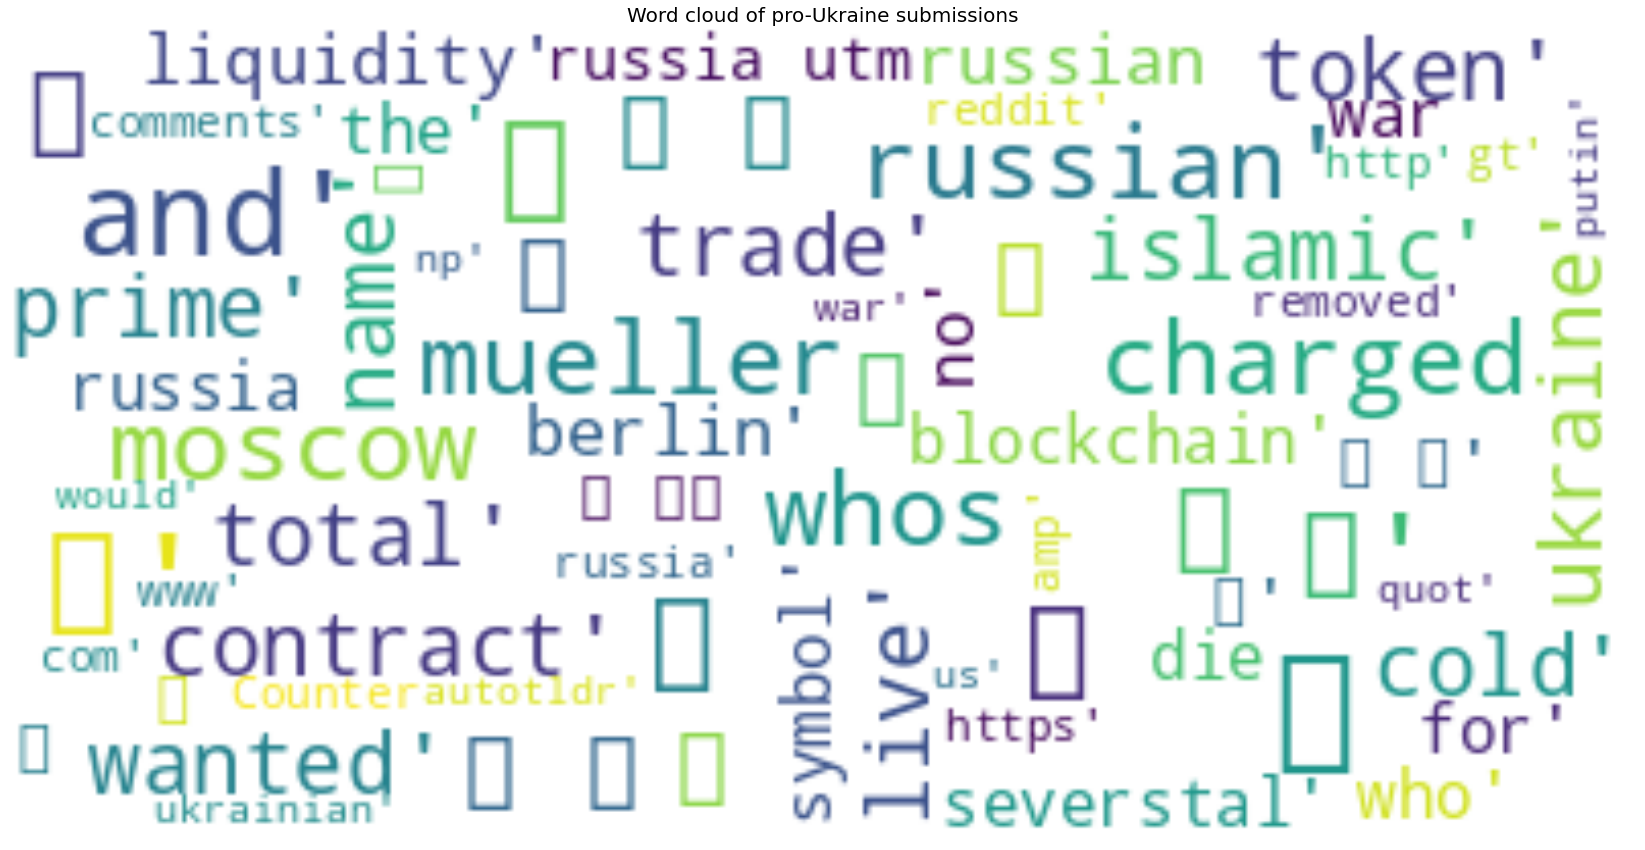

Text(0.5, 1.0, 'Word cloud of pro-Ukraine submissions')

In [0]:
import matplotlib.pyplot as plt
fig,ax=plt.subplots(1,1,figsize=(30,15))
ax.imshow(gen_wordcloud(count_ukr),interpolation="bilinear")
ax.axis("off")
ax.set_title("Word cloud of pro-Ukraine submissions",fontsize=20)

Out[35]:

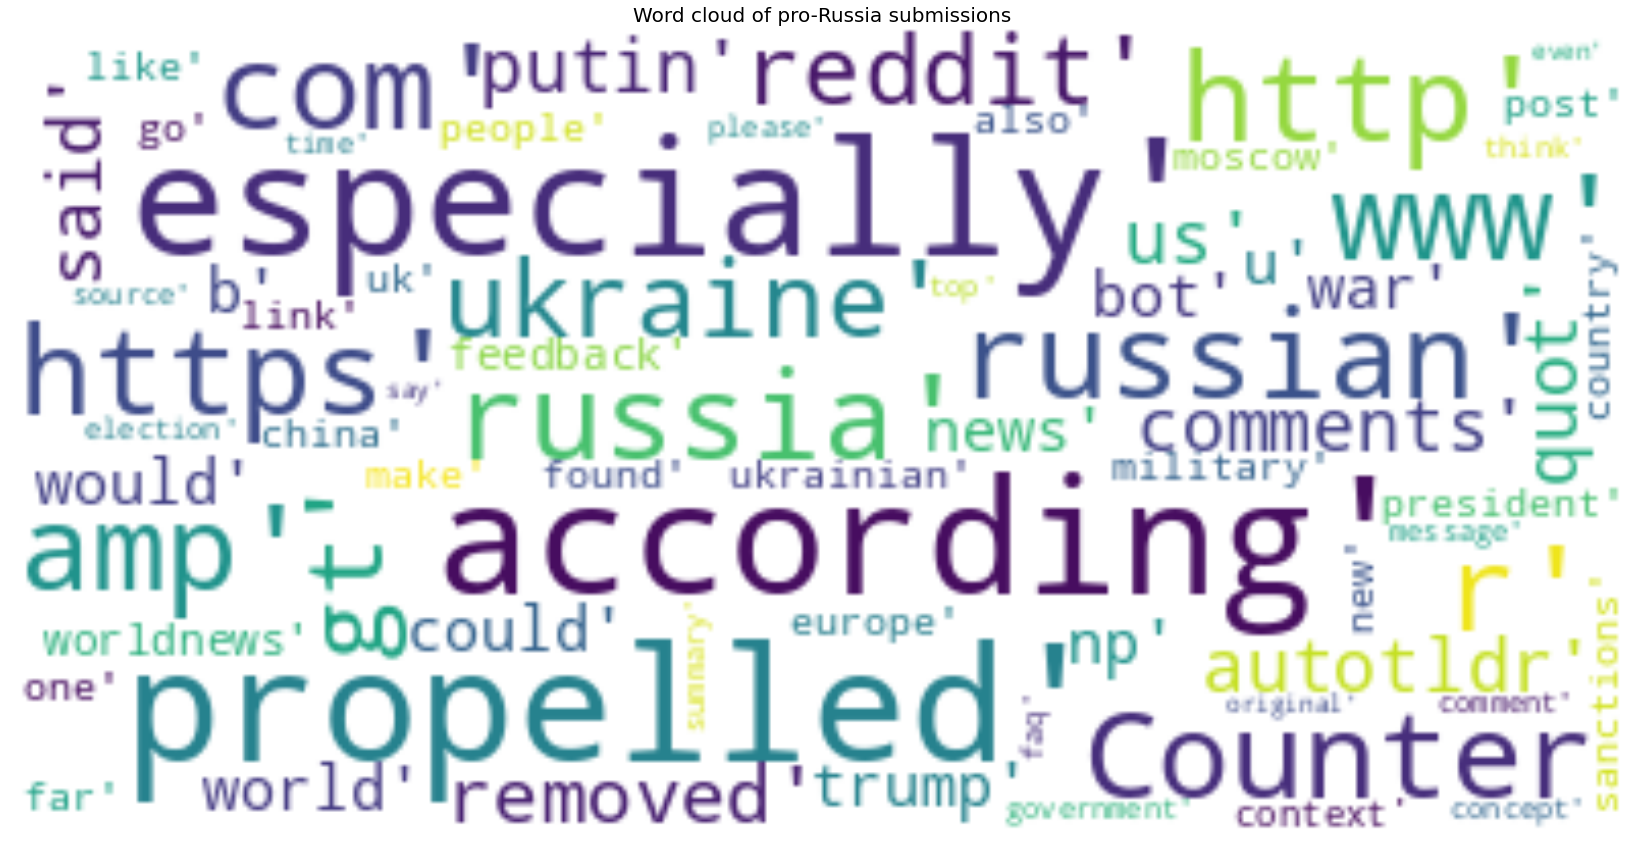

Text(0.5, 1.0, 'Word cloud of pro-Russia submissions')

In [0]:
import matplotlib.pyplot as plt
fig,ax=plt.subplots(1,1,figsize=(30,15))
ax.imshow(gen_wordcloud(count_rus),interpolation="bilinear")
ax.axis("off")
ax.set_title("Word cloud of pro-Russia submissions",fontsize=20)

Out[36]:

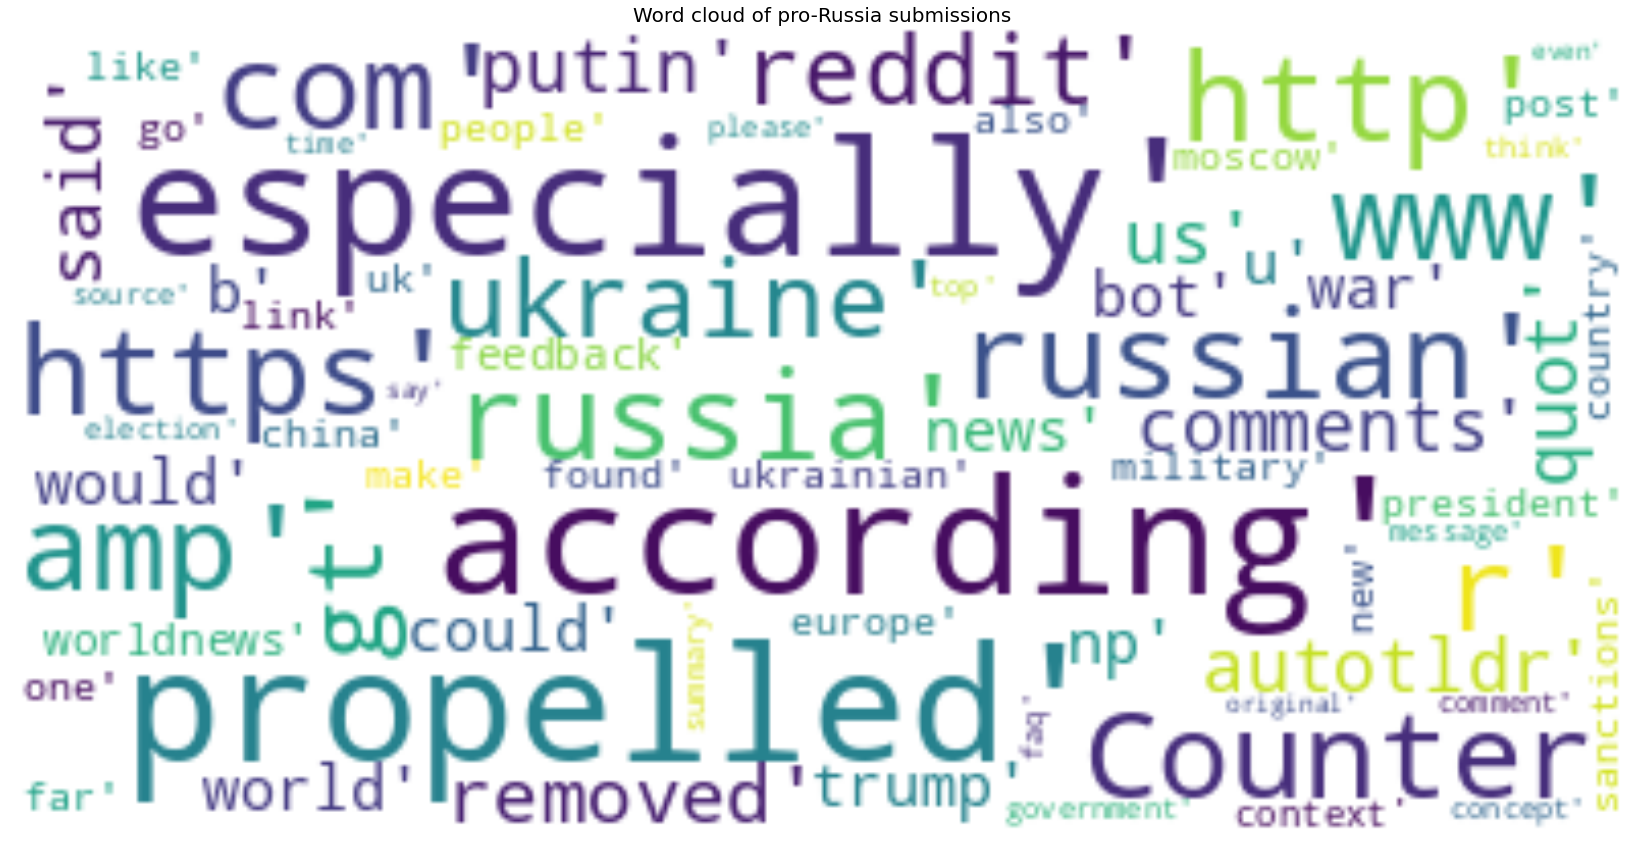

Text(0.5, 1.0, 'Word cloud of pro-Russia submissions')

In [0]:
import matplotlib.pyplot as plt
fig,ax=plt.subplots(1,1,figsize=(30,15))
ax.imshow(gen_wordcloud(count_rus),interpolation="bilinear")
ax.axis("off")
ax.set_title("Word cloud of pro-Russia submissions",fontsize=20)